In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("data/superstore_sales.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non

In [6]:
df.isnull().sum().sort_values(ascending=False)

Row ID           0
Postal Code      0
Discount         0
Quantity         0
Sales            0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
State            0
Order ID         0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Profit           0
dtype: int64

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df['Month'] = df['Order Date'].dt.to_period('M')
df['Year'] = df['Order Date'].dt.year
df['Weekday'] = df['Order Date'].dt.day_name()
df['Week'] = df['Order Date'].dt.isocalendar().week

In [9]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()

print(f"🛒 Total Sales     : ₹{total_sales:,.2f}")
print(f"💰 Total Profit    : ₹{total_profit:,.2f}")
print(f"📦 Total Orders    : {total_orders}")
print(f"👥 Unique Customers: {total_customers}")

🛒 Total Sales     : ₹2,297,200.86
💰 Total Profit    : ₹286,397.02
📦 Total Orders    : 5009
👥 Unique Customers: 793


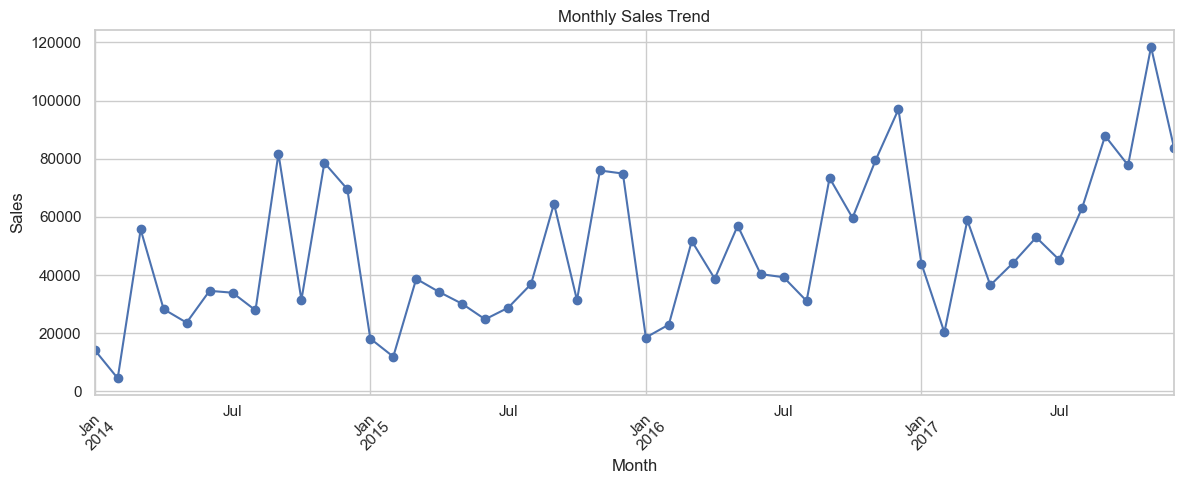

In [10]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

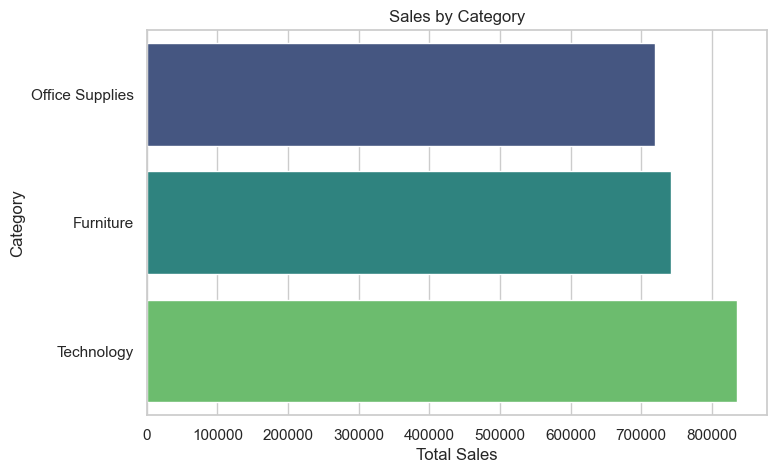

In [11]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis", hue=category_sales.index, legend=False, dodge=False)
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()

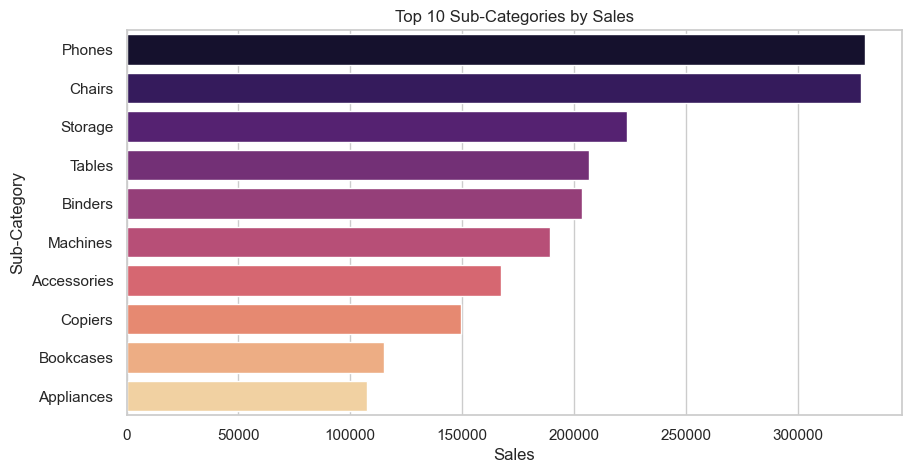

In [12]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette="magma", hue=subcat_sales.index, legend=False, dodge=False)
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.show()

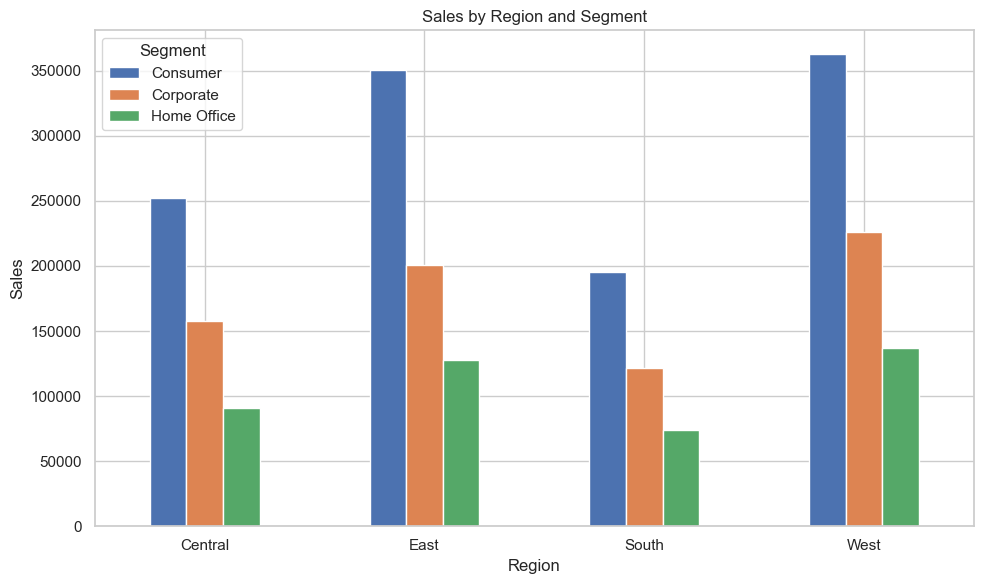

In [13]:
region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().unstack()

region_segment.plot(kind='bar', figsize=(10,6))
plt.title("Sales by Region and Segment")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

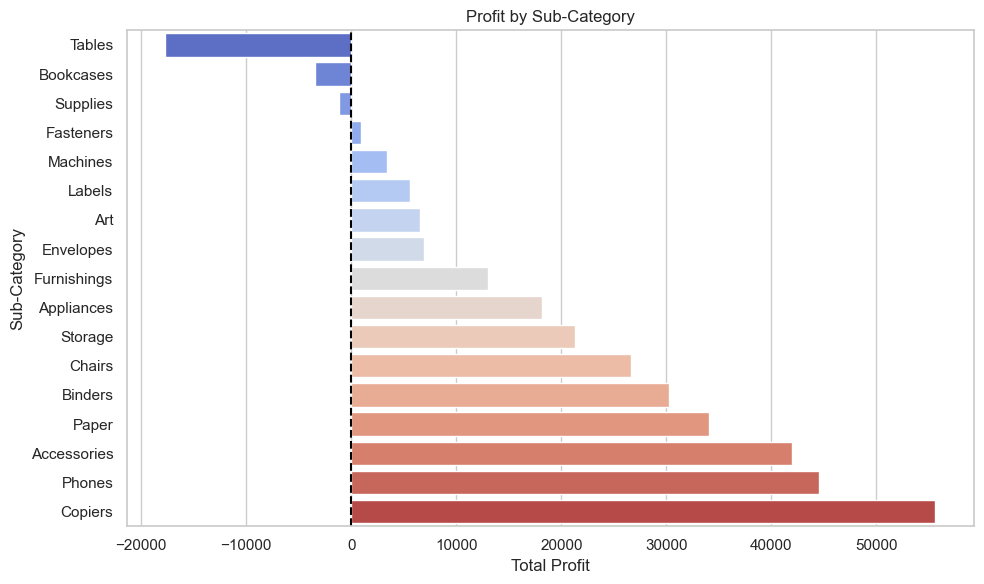

In [14]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=subcategory_profit.values, y=subcategory_profit.index, palette="coolwarm", hue=subcategory_profit.index, legend=False, dodge=False)
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

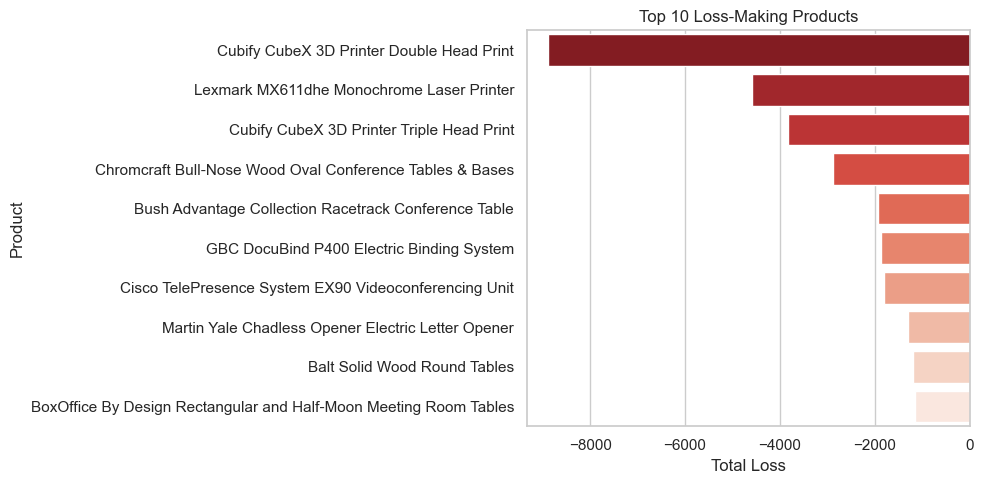

In [15]:
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=loss_products.values, y=loss_products.index, palette="Reds_r", hue=loss_products.index, legend=False, dodge=False)
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Total Loss")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

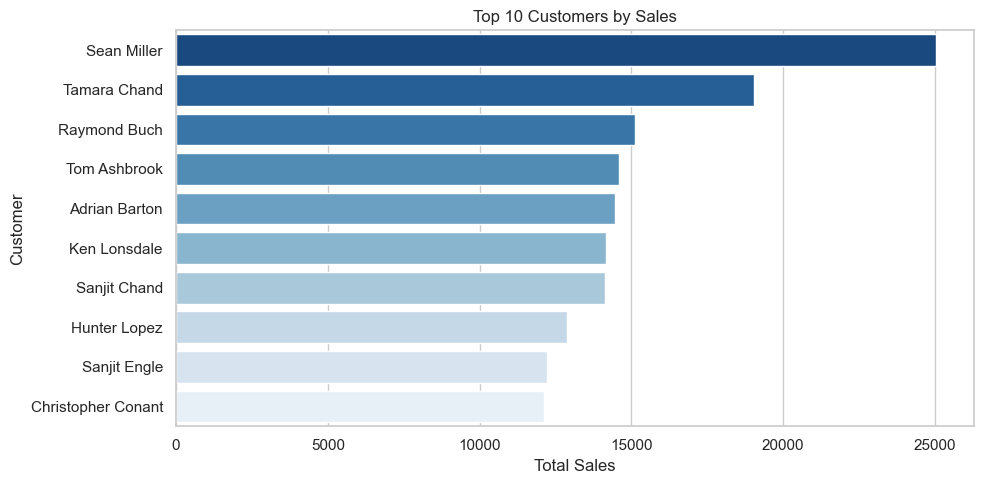

In [16]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues_r", hue=top_customers.index, legend=False, dodge=False)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()

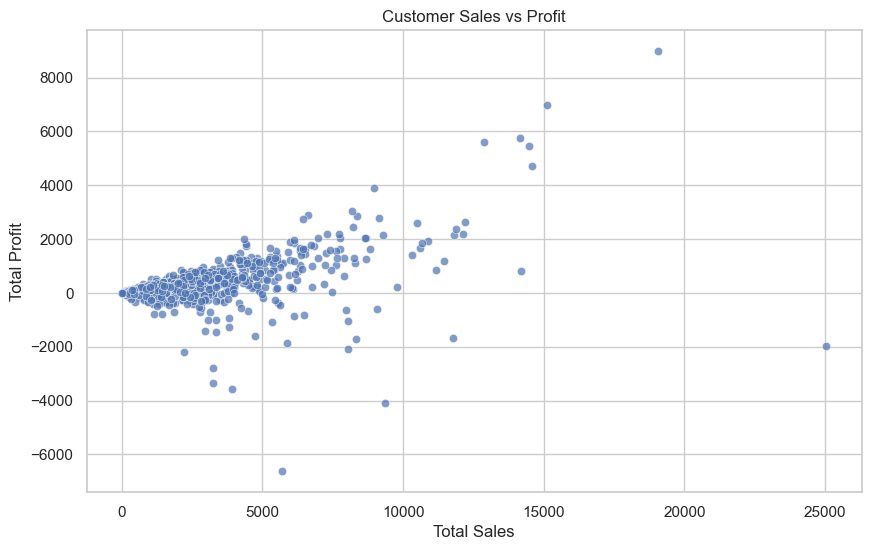

In [17]:
customer_df = df.groupby('Customer ID')[['Sales', 'Profit']].sum()

plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_df, x='Sales', y='Profit', alpha=0.7)
plt.title("Customer Sales vs Profit")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()